In [ ]:
conda install -c anaconda ephem

In [ ]:
conda install -c conda-forge pystan

In [ ]:
!pip install prophet

In [6]:
import pandas as pd
from prophet import Prophet

In [7]:
df = pd.read_csv('mydataset.csv')

In [8]:
df.head()

,Date,Store/Product,Value
0,20180101,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [9]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y%m%d")

In [10]:
df.dtypes

Date             datetime64[ns]
Store/Product            object
Value                   float64
dtype: object

In [11]:
df

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531000
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000000
...,...,...,...
3235,2020-12-12,SAN_FRANCISCO-TESLA_MODEL_S,2899.835050
3236,2020-12-13,SAN_FRANCISCO-TESLA_MODEL_S,2896.835050
3237,2020-12-14,SAN_FRANCISCO-TESLA_MODEL_S,3094.019060
3238,2020-12-15,SAN_FRANCISCO-TESLA_MODEL_S,2492.132196


In [12]:
frame = df[df['Store/Product'] == 'LOS_ANGELES-TESLA_MODEL_X'].copy()

In [13]:
frame

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531000
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000000
...,...,...,...
1075,2020-12-12,LOS_ANGELES-TESLA_MODEL_X,3167.594500
1076,2020-12-13,LOS_ANGELES-TESLA_MODEL_X,3167.594500
1077,2020-12-14,LOS_ANGELES-TESLA_MODEL_X,3383.354511
1078,2020-12-15,LOS_ANGELES-TESLA_MODEL_X,2714.591329


In [14]:
frame.drop('Store/Product', axis = 1, inplace=True)

In [15]:
frame.columns = ['ds','y']

In [16]:
frame.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [17]:
m = Prophet(interval_width = 0.95)

In [18]:
training_run = m.fit(frame)

01:40:58 - cmdstanpy - INFO - Chain [1] start processing
01:40:59 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=400,freq='D')

In [20]:
forecast = m.predict(future)

In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3508.538888,893.454558,4027.273456,3508.538888,3508.538888,-1109.735582,-1109.735582,-1109.735582,16.620635,16.620635,16.620635,-1126.356216,-1126.356216,-1126.356216,0.0,0.0,0.0,2398.803306
1,2018-01-02,3509.301554,809.569136,3909.037173,3509.301554,3509.301554,-1119.863811,-1119.863811,-1119.863811,-11.282460,-11.282460,-11.282460,-1108.581351,-1108.581351,-1108.581351,0.0,0.0,0.0,2389.437743
2,2018-01-03,3510.064220,772.010714,4087.223658,3510.064220,3510.064220,-1094.033093,-1094.033093,-1094.033093,-4.411020,-4.411020,-4.411020,-1089.622073,-1089.622073,-1089.622073,0.0,0.0,0.0,2416.031127
3,2018-01-04,3510.826886,894.632509,4035.315327,3510.826886,3510.826886,-1047.078183,-1047.078183,-1047.078183,22.476599,22.476599,22.476599,-1069.554782,-1069.554782,-1069.554782,0.0,0.0,0.0,2463.748703
4,2018-01-05,3511.589552,871.939636,4010.173038,3511.589552,3511.589552,-1083.090940,-1083.090940,-1083.090940,-34.582343,-34.582343,-34.582343,-1048.508597,-1048.508597,-1048.508597,0.0,0.0,0.0,2428.498612


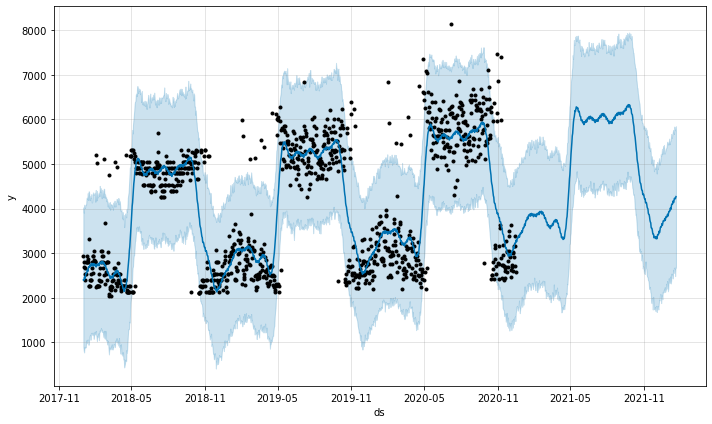

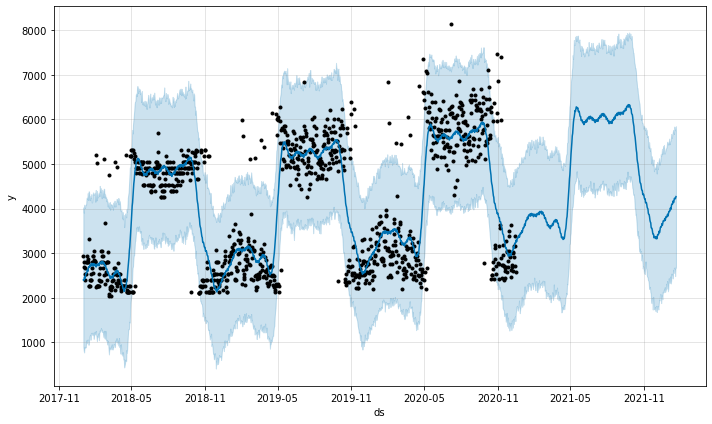

In [22]:
m.plot(forecast)

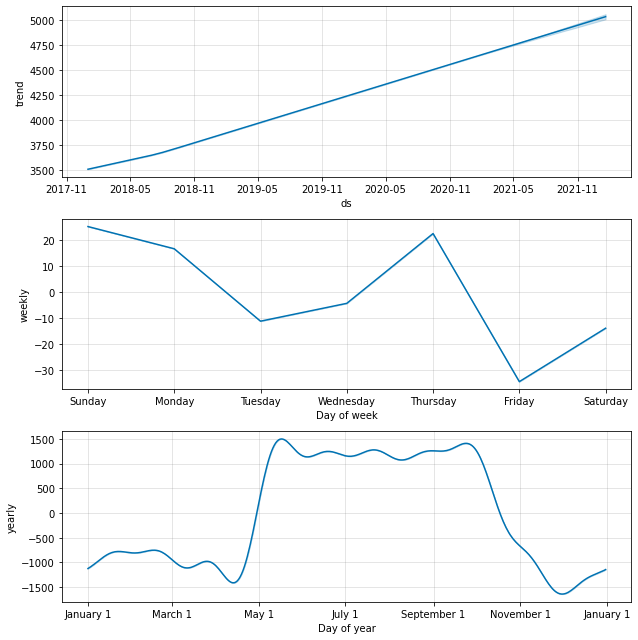

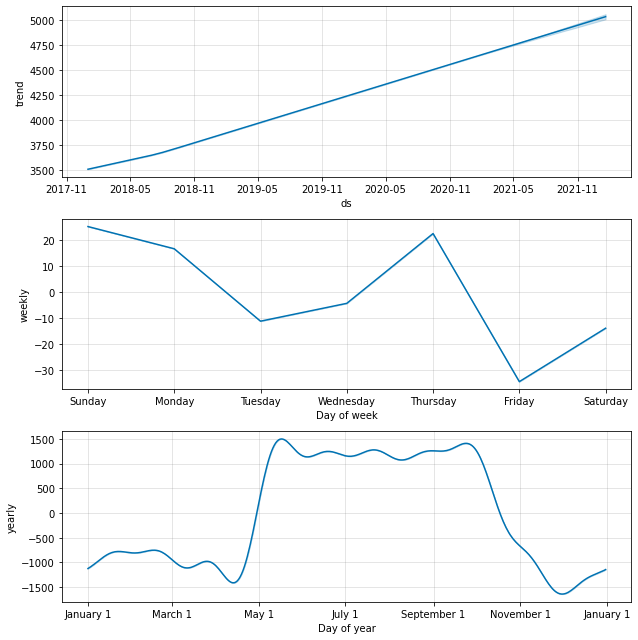

In [23]:
m.plot_components(forecast)

In [26]:
from prophet.diagnostics import cross_validation

In [39]:
df_cv = cross_validation(m, initial='365 days', period='15 days', horizon='30 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/46 [00:00<?, ?it/s]

01:59:12 - cmdstanpy - INFO - Chain [1] start processing
01:59:12 - cmdstanpy - INFO - Chain [1] done processing
01:59:12 - cmdstanpy - INFO - Chain [1] start processing
01:59:12 - cmdstanpy - INFO - Chain [1] done processing
01:59:13 - cmdstanpy - INFO - Chain [1] start processing
01:59:13 - cmdstanpy - INFO - Chain [1] done processing
01:59:14 - cmdstanpy - INFO - Chain [1] start processing
01:59:14 - cmdstanpy - INFO - Chain [1] done processing
01:59:14 - cmdstanpy - INFO - Chain [1] start processing
01:59:14 - cmdstanpy - INFO - Chain [1] done processing
01:59:15 - cmdstanpy - INFO - Chain [1] start processing
01:59:15 - cmdstanpy - INFO - Chain [1] done processing
01:59:16 - cmdstanpy - INFO - Chain [1] start processing
01:59:16 - cmdstanpy - INFO - Chain [1] done processing
01:59:16 - cmdstanpy - INFO - Chain [1] start processing
01:59:16 - cmdstanpy - INFO - Chain [1] done processing
01:59:17 - cmdstanpy - INFO - Chain [1] start processing
01:59:17 - cmdstanpy - INFO - Chain [1]

In [36]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-12,3099.993103,1832.640949,4365.133018,3211.950000,2019-01-11
1,2019-01-13,3116.822266,1909.889220,4409.232822,3214.199296,2019-01-11
2,2019-01-14,3198.979223,1834.538779,4512.511560,3657.500000,2019-01-11
3,2019-01-15,3070.288255,1733.598414,4379.520914,2419.270000,2019-01-11
4,2019-01-16,3061.434090,1721.227453,4399.188576,2396.660000,2019-01-11


In [40]:
df1_cv = cross_validation(m, initial='720 days', period='15 days', horizon='30 days')

  0%|          | 0/23 [00:00<?, ?it/s]

01:59:40 - cmdstanpy - INFO - Chain [1] start processing
01:59:40 - cmdstanpy - INFO - Chain [1] done processing
01:59:40 - cmdstanpy - INFO - Chain [1] start processing
01:59:41 - cmdstanpy - INFO - Chain [1] done processing
01:59:41 - cmdstanpy - INFO - Chain [1] start processing
01:59:41 - cmdstanpy - INFO - Chain [1] done processing
01:59:42 - cmdstanpy - INFO - Chain [1] start processing
01:59:42 - cmdstanpy - INFO - Chain [1] done processing
01:59:43 - cmdstanpy - INFO - Chain [1] start processing
01:59:43 - cmdstanpy - INFO - Chain [1] done processing
01:59:43 - cmdstanpy - INFO - Chain [1] start processing
01:59:43 - cmdstanpy - INFO - Chain [1] done processing
01:59:44 - cmdstanpy - INFO - Chain [1] start processing
01:59:44 - cmdstanpy - INFO - Chain [1] done processing
01:59:45 - cmdstanpy - INFO - Chain [1] start processing
01:59:45 - cmdstanpy - INFO - Chain [1] done processing
01:59:45 - cmdstanpy - INFO - Chain [1] start processing
01:59:45 - cmdstanpy - INFO - Chain [1]

In [41]:
df1_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-23,3120.096762,1620.800290,4553.431696,2609.460000,2019-12-22
1,2019-12-24,3078.244345,1670.224015,4538.706091,2403.302818,2019-12-22
2,2019-12-25,3040.039916,1444.901981,4416.669113,2191.840000,2019-12-22
3,2019-12-26,3078.450320,1678.699122,4581.090970,2489.760000,2019-12-22
4,2019-12-27,3066.456586,1594.649177,4589.787831,2489.760000,2019-12-22
